In [2]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils.land import get_ocean_coords, get_land_coords
from isca_tools.utils import area_weighting, lat_lon_coord_slice
from isca_tools.land import write_land
from isca_tools.run.create_files import write_var

2025-02-06 18:03:35,445 - isca - WARNING - Environment variable GFDL_SOC not set, but this is only required if using SocratesCodebase. Setting to None


## Create bucket file
Reads 2 days of bucket depth from a previous experiment, and creates bucket.nc file from it.

In [32]:
bucket_depth_input = isca_tools.load_dataset('tau_sweep/land/meridional_band/bucket_evap/evap=0_1/k=1/').bucket_depth.isel(time=[60, -1])
#bucket_depth_input.sel(lon=slice(150, 210)).plot()

In [49]:
# bucket_depth_input.rolling(lat=5, lon=1, center=True).construct({"lat": "window_lat", "lon": "window_lon"}).mean(dim=["window_lat", "window_lon"]).isel(time=0).sel(lon=slice(150, 210)).plot()

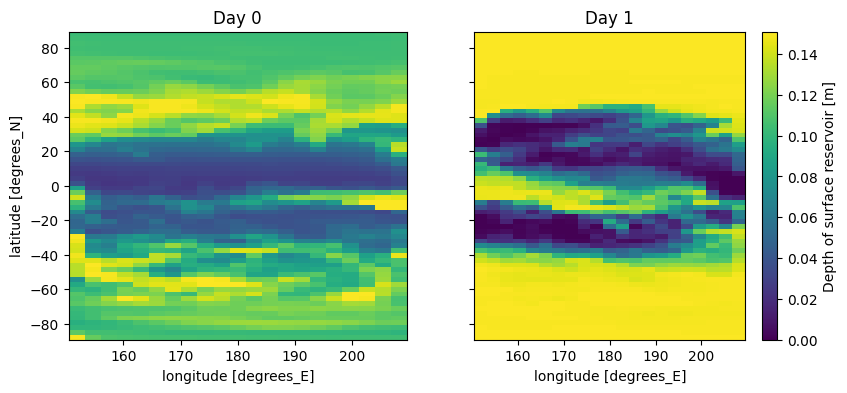

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(0.8*12, 0.8*5), sharex=True, sharey=True)
bucket_depth_input.sel(lon=slice(150, 210)).isel(time=0).plot(ax=ax[0], vmin=0, vmax=0.151, add_colorbar=False)
bucket_depth_input.sel(lon=slice(150, 210)).isel(time=1).plot(ax=ax[1], vmin=0, vmax=0.151)
ax[0].set_title('Day 0')
ax[1].set_title('Day 1')
ax[1].set_ylabel(None)
plt.show()

In [77]:
# write above bucket depth to this experiment
exp_name = 'tau_sweep/land/meridional_band/bucket_file/test_vary_time/'
job_path = '/Users/joshduffield/Documents/StAndrews/Isca/jobs/'
try:
    write_var('bucket', os.path.join(job_path, exp_name), var_array=bucket_depth_input.to_numpy(),
              lat_var=bucket_depth_input.lat.to_numpy(), lon_var=bucket_depth_input.lon.to_numpy(), time_var=np.arange(2),
              time_interpolate='wrap')      # so keeps alternating between 2 time coordinates in bucket_depth_input
except ValueError:
    print('bucket file already exists')

Output written to: /Users/joshduffield/Documents/StAndrews/Isca/jobs/tau_sweep/land/meridional_band/bucket_file/test_vary_time/bucket.nc


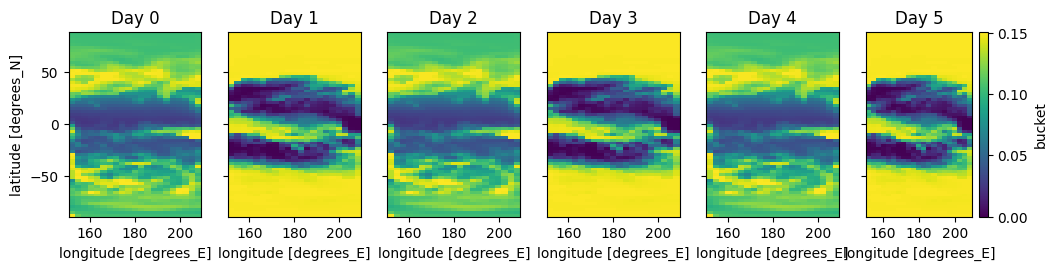

In [100]:
# Plot saved bucket depth
bucket_depth_saved = xr.load_dataset(os.path.join(job_path, exp_name)+'bucket.nc', decode_times=False).bucket
fig, ax = plt.subplots(1, 6, figsize=(0.8*15, 0.8*3), sharex=True, sharey=True)
for i in range(6):
    bucket_depth_saved.sel(lon=slice(150, 210)).isel(time=i).plot(ax=ax[i], vmin=0, vmax=0.151, add_colorbar=False if i<5 else True)
    ax[i].set_title(f'Day {i}')
    if i > 0:
        ax[i].set_ylabel(None)
plt.show()

In [96]:
# Sanity check that they are the same
# Check several times, as
print([np.abs(bucket_depth_saved[bucket_depth_input.time.size*i:bucket_depth_input.time.size*i+bucket_depth_input.time.size].to_numpy() -
              bucket_depth_input.to_numpy()).max() for i in [0, 2, 7, 10]])

[0.0, 0.0, 0.0, 0.0]


## Check simulation has this bucket depth for all times

In [101]:
bucket_depth_sim = isca_tools.load_dataset(exp_name).bucket_depth

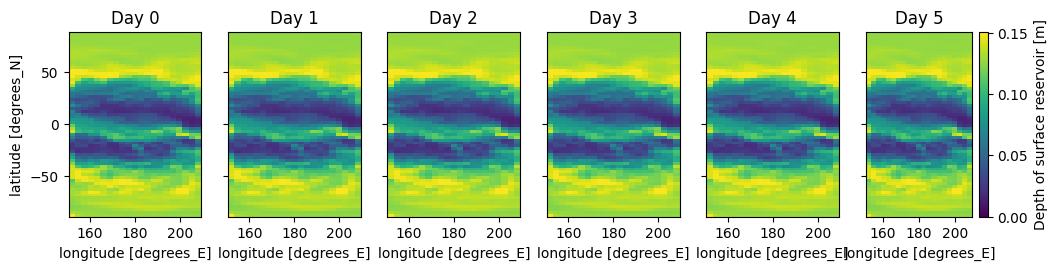

In [102]:
fig, ax = plt.subplots(1, 6, figsize=(0.8*15, 0.8*3), sharex=True, sharey=True)
for i in range(6):
    bucket_depth_sim.sel(lon=slice(150, 210)).isel(time=i).plot(ax=ax[i], vmin=0, vmax=0.151, add_colorbar=False if i<5 else True)
    ax[i].set_title(f'Day {i}')
    if i > 0:
        ax[i].set_ylabel(None)
plt.show()

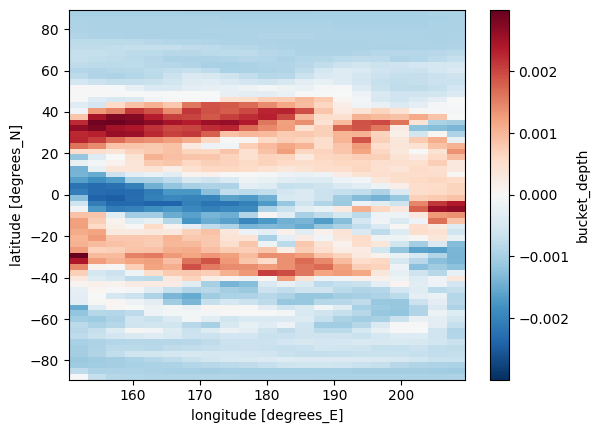

In [118]:
(bucket_depth_sim.sel(lon=slice(150, 210)).isel(time=1)-bucket_depth_sim.sel(lon=slice(150, 210)).isel(time=0)).plot()

In [107]:
np.round(np.max(np.abs(bucket_depth_sim.to_numpy() - bucket_depth_saved.to_numpy()[:1]), axis=(1, 2)), 6)

array([8.949219, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.658142,
       8.949219, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.587219,
       9.022522, 8.587219, 9.022522, 8.587219, 9.022522, 8.658142],
      dtype=float32)